In [115]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

The first part of the project consists in studying basic estimators supposing that the data follows a given distribution such as the exponential one.

In [116]:
#GLOBAL CONSTANTS
mean = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

# Helpers

**Generators**

In [117]:
# EXPONENTIAL GENERATOR - without censored data 
def generate_exponential_perfect(mean, size):
    """
    Generates random numbers following an exponential distribution

    Args:
        mean (float): The mean of the distribution.
        size (int): The number of random numbers to generate.

    Returns:
        An array of random numbers following an exponential distribution
        with the given mean.
    """
    return np.random.exponential(scale=mean, size=size)

In [118]:
def generate_exponential(mean, size , obs_duration):
    """
    Generates random numbers following an exponential distribution with some censored data

    Args:
        mean (float): The mean of the distribution.
        size (int): The number of random numbers to generate.
        obs_duration (int) : Duration of observation

    Returns:
        An array of random numbers following an exponential distribution
        with the given mean.
    """
    T = np.random.exponential(scale=mean, size=size)
    ancient = obs_duration * np.random.rand(size) # uniform distribution
    Y = T*(T<=ancient) +  ancient*(T>ancient)
    return Y , ancient

**Confidence interval**

In [119]:
def confidence_lvl(lower_bound, upper_bound, estimators):
    """
    Calculates the percentage of estimates falling within a given confidence interval.

    Parameters:
    lower_bound (float): The lower limit of the confidence interval.
    upper_bound (float): The upper limit of the confidence interval.
    estimators (list[float]): A list of estimates.

    Returns:
    float: The percentage of estimates falling within the confidence interval.
    """
    in_IC=0
    for x in estimators : 
        if (x<upper_bound and x>lower_bound) : in_IC +=1
    return (in_IC / len(estimators))*100

In [120]:
def CI_plot(clv_values, lower, upper):
    """
    Plots confidence intervals 
    
    Args:
        clv_values : clv values related to the confidence intervals
        lower : The lower limit of the confidence interval.
        upper : The upper limit of the confidence interval.
    """
    
    # Define x-axis values
    x = range(len(clv_values))

    # Set figure size
    fig, ax = plt.subplots(figsize=(20, 6))

    # Plot the data
    ax.plot(x, clv_values, label='Computed Value', color='blue')
    ax.fill_between(x, lower, upper, alpha=0.2, label='95% CI', color='gray')

    # Add labels and legend
    ax.set_xlabel('Sample')
    ax.set_ylabel('CLV')
    ax.set_title('CLV Computation Results')
    ax.legend(loc='best')

    # Add gridlines
    ax.grid(True, alpha=0.3)

    # Show the plot
    plt.show()

In [121]:
def bootstrap(data1, data2): #
    """
    Performs bootstrap resampling on two datasets by randomly selecting data points with replacement.

    Parameters:
    data1 (list): The first dataset to be resampled.
    data2 (list): The second dataset to be resampled.

    Returns:
    tuple: A tuple of two lists, containing the resampled data from each dataset.
    """
    # Initialize two empty lists to hold the resampled data
    sample1 = []
    sample2 = []

    # Loop through each data point in the datasets
    for i in range(len(data1)):
        # Generate a random integer between 0 and the length of the dataset - 1
        rand_int = random.randint(0, len(data1) - 1)
        # Add the randomly selected data points to the resampled datasets
        sample1.append(data1[rand_int])
        sample2.append(data2[rand_int])

    # Return the resampled datasets as a tuple
    return sample1, sample2

In [122]:
def CI_multiplot(clv, lower , upper):

    # plot confidence interval
    CI_plot(clv, lower, upper)

    # plot of the distribution
    sns.histplot(lower, kde = True).set_title("Distribution of IC"),sns.histplot(upper, kde = True).set_title("Distribution of IC")

    # print confidence level
    print(f"CONFIDENCE LEVEL: {confidence_lvl(np.mean(lower), np.mean(upper), clv):.2f}%")

##### other functions

In [123]:
def print_conv_plot_distribution(size, n ,mean, clv):
    
    # clv_avg = clv_hat that averages all the estimated values of clv
    clv_avg = np.mean(clv)
    
    # standard deviation of clv
    clv_std = np.std(clv)
    
    # difference between clv predicted and the actual value
    clv_errors = np.array(clv) - mean
    
    # print convergence values
    print("CONVERGENCE :\n \t size of each dataset =%d \n \t number of datasets =%d \n \t CLV thoery = %d \n \t CLV real = %f  \n \t Standard deviation CLV= %f" % (size, n,clv_avg ,mean,clv_std))
    
    # plot distribution of errors
    sns.histplot(clv_errors, kde = True).set_title("Distribution of CLV errors for all samples")

# Geometric estimator (not censored)

##### Functions 

In [124]:
def geom_clv_estimator(T):
    """
    Function to calculate the geometric clv estimator
    
    Parameters:
    T (list or array): list or array of numerical values
    
    Returns:
    float: the geometric clv estimator of the values in T
    """
    return np.sum(T)/len(T)

In [125]:
def CI_geom_nc_clv(a,Y):
    len_Y = len(Y)
    lower = np.sum(Y)/(len_Y + a * np.sqrt(len_Y))
    upper = np.sum(Y)/(len_Y + - a * np.sqrt(len_Y))
    
    return lower, upper

#####  test

In [126]:
clv_geom = []
Y_n = []

for i in range(n):
    Y_i = generate_exponential_perfect(mean, size)
    Y_n.append(Y_i)
    clv_geom.append(geom_clv_estimator(Y_i))

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 9 
 	 CLV real = 10.000000  
 	 Standard deviation CLV= 0.098640


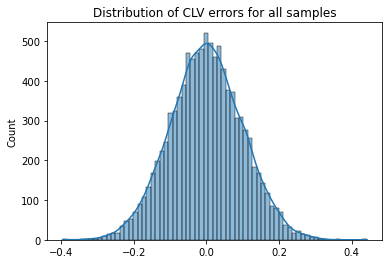

In [127]:
print_conv_plot_distribution(size, n ,mean, clv_geom)

As expected the error is normally distributed. For all the samples $Y_i$ for $i\in \{1,...,n\}$ the prediction error $(prediction_i - expectation_i)$ folllows a gaussian distribution with mean 0.


In [128]:
lower_geom_nc = []
upper_geom_nc = []

for i in range(n):
    ci = CI_geom_nc_clv(1.96, Y_n[i])
    lower_geom_nc.append(ci[0])
    upper_geom_nc.append(ci[1])

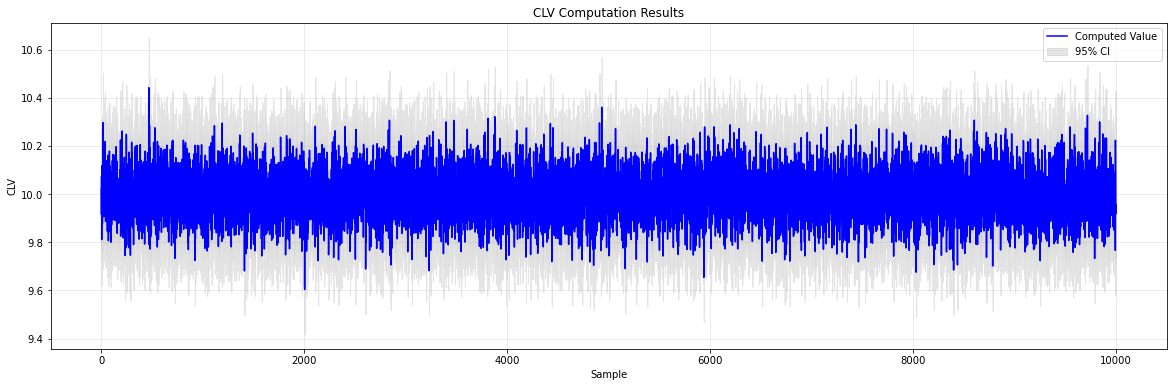

CONFIDENCE LEVEL: 95.28%


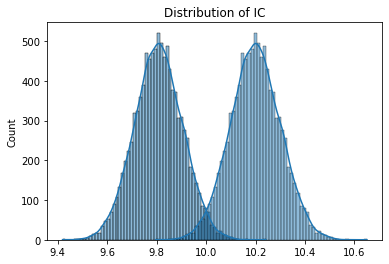

In [129]:
# plot confidence interval
CI_multiplot(clv_geom, lower_geom_nc, upper_geom_nc)

## Geometric (censored)

##### Functions

In [130]:
def geom_c_clv_estimator(Y, ancient):
    A = np.where(Y!=ancient)[0]  
    N = np.where(Y==ancient)[0]
    return (np.sum(Y[A]) + np.sum(ancient[N]))/len(A)

##### tests

In [131]:
clv_geom_c = []

for i in range(n):
    Y_new, ancient_new = generate_exponential(mean, size,DureeObs )
    clv_geom_c.append(geom_c_clv_estimator(Y_new, ancient_new))

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10 
 	 CLV real = 10.000000  
 	 Standard deviation CLV= 0.126242


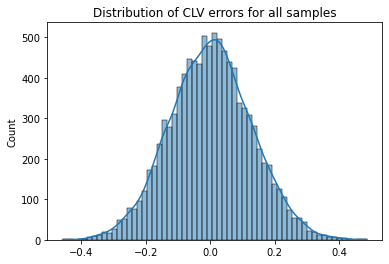

In [132]:
print_conv_plot_distribution(size, n ,mean, clv_geom_c)

## Exponential (not censored)

<AxesSubplot:ylabel='Count'>

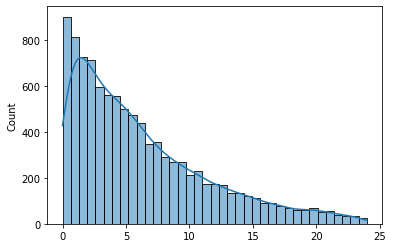

In [133]:
Y, ancient = generate_exponential(mean, size, DureeObs)
sns.histplot(Y, kde = True)

## Exponential (censored)

##### Functions

In [134]:
def exp_clv_estimator(Y , ancient):
    A = np.where(Y!=ancient)[0] # available data : T_i < a_i
    return np.sum(Y) /len(A)

In [135]:
def CI_exp_c_clv(a,Y,ancient):
    len_A = len(np.where(Y!=ancient)[0])
    lower = np.sum(Y)/(len_A + a * np.sqrt(len_A))
    upper = np.sum(Y)/(len_A + - a * np.sqrt(len_A))
    
    return lower, upper

##### Tests

In [136]:
clv_exp_c = []
lower_exp_c = []
upper_exp_c = []
for i in range(n):
    Y_new, ancient_new = generate_exponential(mean, size,DureeObs )
    clv_exp_c.append(exp_clv_estimator(Y_new, ancient_new))
    lower_exp_c.append(CI_exp_c_clv(1.96, Y_new, ancient_new)[0])
    upper_exp_c.append(CI_exp_c_clv(1.96, Y_new, ancient_new)[1])


CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10 
 	 CLV real = 10.000000  
 	 Standard deviation CLV= 0.127116


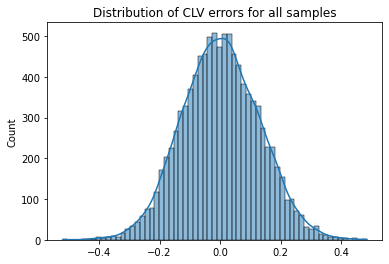

In [137]:
print_conv_plot_distribution(size, n ,mean, clv_exp_c)

The error is still normally distributed and the standart deviation is higher. 
(As censored data are normally distributed, they have no impact on the error distribution. Censored data increase the std of the error)

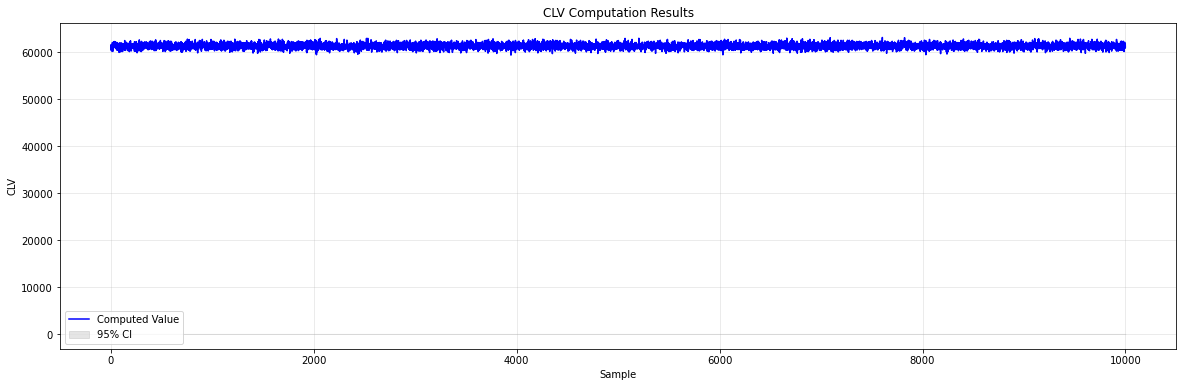

CONFIDENCE LEVEL: 0.00%


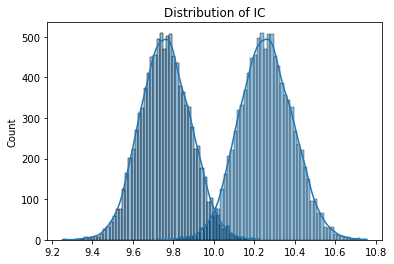

In [138]:
# plot confidence interval
CI_multiplot(clv_exp, lower_exp_c, upper_exp_c)

The estimator is 95% in the IC interval. That confirms the theory.

###### bootstrap

<AxesSubplot:ylabel='Count'>

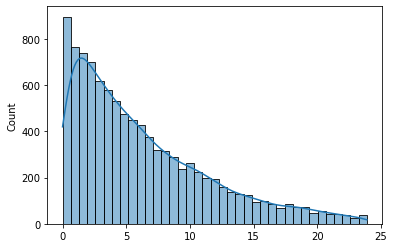

In [139]:
# generate data with an exponential distribution
Y, ancient = generate_exponential(mean, size, DureeObs)

# plot the data
sns.histplot(Y, kde = True)

In [140]:
alpha=1.96
clv_exp = []
lower_exp_cb = []
upper_exp_cb = []
for i in range(n):
    Y_new, ancient_new = bootstrap(Y, ancient)
    clv_exp.append(exp_clv_estimator(Y_new, ancient_new))
    lower_exp_cb.append(CI_exp_c_clv(alpha, Y_new, ancient_new)[0])
    upper_exp_cb.append(CI_exp_c_clv(alpha, Y_new, ancient_new)[1])


CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 62439 
 	 CLV real = 10.000000  
 	 Standard deviation CLV= 528.724859


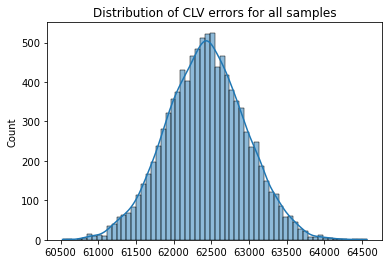

In [141]:
print_conv_plot_distribution(size, n ,mean, clv_exp)

In [114]:
confidence_lvl(np.mean(lower_exp_cb), np.mean(upper_exp_cb), clv_exp)

0.0

# HAAAALTE ! DOIIIIIIIIIIIIIIIIIIIIIIIINE

##### PARETO 

In [ ]:
def generate_pareto(scale, size,obs_duration,shape  ):
    T = np.random.pareto(a=shape, size=size) * scale  # shape parameter (a) set to 1.5
    ancient = obs_duration* np.random.rand(size)  # uniform distribution
    Y = T * (T <= ancient) + ancient * (T > ancient)
    return Y, ancient

In [ ]:
scale = 1
size= 1000
DureeObs = 12*2
shape = 1.5

mean = (shape * scale) /(shape - 1 )

Y ,ancient = generate_pareto(scale, size, DureeObs, shape)
sns.histplot(Y, kde = True)

In [ ]:
len(np.where(Y!=ancient)[0])

In [ ]:
mean

In [ ]:
def pareto_clv_estimator(Y, ancient):
    len_A = len(np.where(Y!=ancient)[0])
    denom = 1- (np.sum(np.log(Y))/len_A)
    return 1 / denom

In [ ]:
clv_pareto = pareto_clv_estimator(Y,ancient)
epsilon = 0.1
n = 1000
max_size = 10000
while (np.abs(clv_pareto-mean)>epsilon and (n <= max_size)) :
    n +=1
    Y_new, ancient_new = generate_pareto(mean, n, DureeObs,shape)
    clv_pareto = pareto_clv_estimator(Y_new, ancient_new)


In [ ]:
print("CONVERGENCE WITH DIFFERENCE OF ε = %.3f :\n \t size of dataset =%d \n \t CLV real = %f \n \t CLV thoery = %d" % (epsilon, n ,clv_pareto,mean))

In [ ]:
# GENERATOR WITH TWO PARETO DISTRIBUTION
# Parameters
n = 1000
DureeObs = 12*4

moyenne1 = 4  # Mean in the first group
shape1 = 0.1  # Small shape: close to exponential distribution

moyenne2 = 9  # Mean in the second group
shape2 = 0.4  # Larger shape: heavy-tailed distribution

ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

# Expectation across both groups
CLV = ratio_classe*moyenne1+(1-ratio_classe)*moyenne2

# Data generation
location1 = 0
scale = moyenne1*(1-shape1)-location1
T1 = np.random.gamma(shape1, scale, n)

location2 = 0
scale = moyenne2*(1-shape2)-location2
T2 = np.random.gamma(shape2, scale, n)

ber = np.random.rand(n) > ratio_classe

T = (1-ber)*T1 + ber*T2

Duree_depuis_souscription = DureeObs * np.random.rand(n)
Y = T*(T<Duree_depuis_souscription)
#Y = np.where(T<Duree_depuis_souscription, T, np.nan)


# The data is now (Y, Duree_depuis_souscription)

In [ ]:
# GENERATOR WITH ONLY ONE PARETO DISTRIBUTION

# Parameters
n = 1000
DureeObs = 12*4

moyenne1 = 4  # Mean in the first group
shape1 = 0.1  # Small shape: close to exponential distribution

#moyenne2 = 9  # Mean in the second group
#shape2 = 0.4  # Larger shape: heavy-tailed distribution

#ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

# Expectation across both groups
CLV = moyenne1 #+(1-ratio_classe)*moyenne2

# Data generation
location1 = 0   # Que fait location et que fait shape
scale = moyenne1*(1-shape1)-location1
T = np.random.gamma(shape1, scale, n)


# location2 = 0
# scale = moyenne2*(1-shape2)-location2
# T2 = np.random.gamma(shape2, scale, n)

# ber = np.random.rand(n) > ratio_classe  

# T = (1-ber)*T1 + ber*T2

Duree_depuis_souscription = DureeObs * np.random.rand(n) # Q
Y = T*(T<=Duree_depuis_souscription) +  Duree_depuis_souscription*(T>Duree_depuis_souscription)
#Y = np.where(T<Duree_depuis_souscription, T, np.nan)

# The data is now (Y, Duree_depuis_souscription)

In [ ]:
df = pd.DataFrame({'Y': Y, 'DUREE_SOUSCRIPTION':Duree_depuis_souscription}, columns=['Y', 'DUREE_SOUSCRIPTION'])

In [ ]:
df.describe()

In [ ]:
# null values
df.isnull().sum()

In [ ]:
sns.histplot(Y, bins=10, kde = True)
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.title('Distribution of Y')
plt.show()

#### Parametric estimator

In [ ]:
# Define the estimator function
def CLV_pareto_IC(Y, DS):
    D = len(Y[Y<Duree_depuis_souscription])
    denom = 1- (np.sum(np.log(Y))/D)
    return 1 / denom

In [ ]:
print("CLV HAT :",clv_pareto(Y,Duree_depuis_souscription))
print("CLV :", CLV)

In [ ]:
print("CLV HAT :",clv_geom(Y,Duree_depuis_souscription))
print("CLV :", CLV)

##### Confidence interval

In [ ]:
# Perform bootstrap sampling to estimate confidence interval
B = 200  # Number of bootstrap samples
bootstrap_samples = np.random.choice(n, size=(B, n), replace=True)
bootstrap_estimators = np.zeros(B)
for b in range(B):
    Y_b = Y[bootstrap_samples[b]]
    DS_b = Duree_depuis_souscription[bootstrap_samples[b]]
    bootstrap_estimators[b] = clv_hat(Y_b, DS_b)

# Compute confidence interval
alpha = 0.05  # Significance level
lower = np.percentile(bootstrap_estimators, 100*(alpha/2))
upper = np.percentile(bootstrap_estimators, 100*(1-alpha/2))

print("CLV hat: ", clv_hat(Y, Duree_depuis_souscription))
print("95% confidence interval: [", lower, ",", upper, "]")

In [ ]:
print("VAR(CLV hat): ", bootstrap_estimators.std()**2)

In [ ]:
import seaborn as sns

# Plot the bar chart
sns.histplot(bootstrap_estimators, bins=30, kde=True)

# Show the plot
plt.show()



#### Geometric with Nan data

In [ ]:
# Define the estimator function
#
def clv_geom(Y, DS):
    np.where(~np.isnan(Y))[0]  
    N = np.where(np.isnan(Y))[0]
    return (np.sum(Y[A]) + np.sum(DS[N]))/len(A)

In [ ]:
# Parameters
n = 1000
DureeObs = 12*4

moyenne1 = 4  # Mean in the first group
p1 = 0.2  # Probability of success in each trial, for a geometric distribution

moyenne2 = 9  # Mean in the second group
p2 = 0.6  # Probability of success in each trial, for a geometric distribution

ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

# Expectation across both groups
CLV = ratio_classe*moyenne1+(1-ratio_classe)*moyenne2

# Data generation
T1 = np.random.geometric(p1, n)/p1 - 1  # Subtract 1 to shift distribution
T1 = T1 * moyenne1/np.mean(T1)  # Rescale to match mean

T2 = np.random.geometric(p2, n)/p2 - 1  # Subtract 1 to shift distribution
T2 = T2 * moyenne2/np.mean(T2)  # Rescale to match mean

ber = np.random.rand(n) > ratio_classe

T = (1-ber)*T1 + ber*T2

Duree_depuis_souscription = DureeObs * np.random.rand(n)
Y = T*(T<Duree_depuis_souscription)
#Y = np.where(T<Duree_depuis_souscription, T, np.nan)

# The data is now (Y, Duree_depuis_souscription)


In [ ]:
df2 = pd.DataFrame({'Y': Y, 'DUREE_SOUSCRIPTION':Duree_depuis_souscription}, columns=['Y', 'DUREE_SOUSCRIPTION'])

In [ ]:
df2.describe()

In [ ]:
print("CLV HAT :",clv_hat(Y,Duree_depuis_souscription))
print("CLV :", CLV)

In [ ]:
# Perform bootstrap sampling to estimate confidence interval
B = 200  # Number of bootstrap samples
bootstrap_samples = np.random.choice(n, size=(B, n), replace=True)
bootstrap_estimators = np.zeros(B)
for b in range(B):
    Y_b = Y[bootstrap_samples[b]]
    DS_b = Duree_depuis_souscription[bootstrap_samples[b]]
    bootstrap_estimators[b] = clv_hat(Y_b, DS_b)

# Compute confidence interval
alpha = 0.05  # Significance level
lower = np.percentile(bootstrap_estimators, 100*(alpha/2))
upper = np.percentile(bootstrap_estimators, 100*(1-alpha/2))

print("CLV hat: ", clv_hat(Y, Duree_depuis_souscription))
print("95% confidence interval: [", lower, ",", upper, "]")

In [ ]:
# Plot the bar chart
sns.histplot(bootstrap_estimators, bins=30, kde=True)

# Show the plot
plt.show()


### Quick trial of scikit learn survival analysis package

[Survival analysis](https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html#What-is-Survival-Analysis?)

In [ ]:
!pip install scikit-survival  

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sksurv.datasets import load_aids

In [ ]:
# read the dataset
# ex other type of data : bank information source kaggle : https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download

"""
AIDS Clinical Trial dataset
The dataset has 1,151 samples and 11 features. The dataset has 2 endpoints:
.AIDS defining event, which occurred for 96 patients (8.3%)
.Death, which occurred for 26 patients (2.3%)
"""

# data_x : The measurements for each patient.
data_x, data_y = load_aids()

In [ ]:
data_x.head(3)

e.tdm: boolean indicating whether the endpoint has been reached or the event time is right censored.

t.tdm: time to distant metastasis (days)

In [ ]:
pd.DataFrame.from_records(data_y[[11, 5, 32, 13, 23]], index=range(1, 6))

In [ ]:
%matplotlib inline
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["censor"], data_y["time"])
plt.step(time, survival_prob, where="post")
plt.ylabel("probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [ ]:
survival_times = np.array([5, 3, 2, 4, 7, 6, 5, 1, 8, 4, 3, 5, 6])
event_indicators = np.array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])
event_indicators_bool = [x==1 for x in event_indicators]

In [ ]:
t , s = kaplan_meier_estimator(event_indicators_bool, survival_times )
plt.plot(t, s)
plt.ylabel("probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Survival function properties:
$$\hat S(t) = \prod_{t_i \leq t} \frac{n_i - d_i}{n_i} = \prod_{t_i \leq t} 1 - \frac{d_i}{n_i} =\prod_{t_i \leq t} 1 - \frac{\text{number of events that happened at time }t_i }{\text{number of individuals known to have survived up to time }t_i } = \prod_{t_i \leq t} p_{t_i} $$

Another form:
$$\hat S(t) = \hat S(t-1)p_t$$


In [ ]:
def kaplan_meier_estm(event_indicators , survival_times ):
    """
    Fits the Kaplan-Meier survival curve to the input event indicators and survival times.

    Parameters:
    survival_times (np array): time from study inclusion to event (death, relapse, etc.)
    event_indicators (binary np array): the event of interest that occurs during the follow-up time (e.g., mortality, relapse, etc.)

    Returns:
    s (np array): estimated survival probabilities at each time point
    t (np array): unique times at which the estimated survival probabilities change.
    """

    # length of dataset
    n = len(survival_times)

    # compute unique survival times
    t = np.unique(survival_times)
    m = len(t)

    # array that store the survival probabilities
    s = np.ones(m)

    # array that store the number of events
    d = np.zeros(m)

    for i in range(m):
        # Count the number of events that occur (event indicator = 1) at time i
        d[i] = np.sum((survival_times == t[i]) & event_indicators)

        # compute the survival probability at time i
        n_i = n - sum(d[:i]) # - d
        s[i] = s[max(0, i-1)] * (1 - d[i] / n_i)
    return t, s


In [ ]:
# Example usage

t_new, s_new = kaplan_meier_estm(event_indicators , survival_times)
print("Difference with KME of sklearn t:",t-t_new)
print("Difference with KME of sklearn s:",s-s_new)
plt.plot(t_new, s_new)
plt.xlabel("Time")
plt.ylabel("Survival probability")
plt.title("Kaplan-Meier Survival Curve")
plt.show()

In [ ]:
#problem : difference of 0.2 on the probabilities ... choice of the formula? 
#next: fonction fit - selon un clustering ? predict - métriques? ??

### Dataset

Since there's not access to the real data, the first step to do is to find/construct a dataset where the CLV can measurable/predictable. One can need to have some features such as: 
* Personal information : occupation, salary, gender, age, marital status, Geolocalisation (Country/town ...etc)
* Date of entry to company/study
* Date of leaving (can be empty if the element didn't quit yet)
* Information related to the person as a client : number & types of products , communication email/call ...